<a href="https://colab.research.google.com/github/racarvajal/Intro_Notebooks_ML/blob/main/Using_PyCaret_notebook_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Short introduction to *PyCaret* for Machine Learning

**PyCaret** (https://pycaret.org) can help us using several Machine Learning (ML) methods and algorithms to predict values from an existing dataset.  

We can install it using  

````bash
    !pip install pycaret
````  

We will also install and update some other packages to use with PyCaret.

In [1]:
!pip install pandas markupsafe==2.0.1 Jinja2 pycaret==2.3.10 colorcet numpy ppscore pacmap==0.6.5 "numba<0.55" tbb borutashap shap umap-learn trimap sklearn-som --upgrade catboost --upgrade xgboost mpl-scatter-density tune-sklearn ray[tune]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 8.3 MB/s 
     |████████████████████████████████| 320 kB 63.6 MB/s 
     |████████████████████████████████| 3.3 MB 37.1 MB/s 
     |████████████████████████████████| 4.0 MB 42.1 MB/s 
     |████████████████████████████████| 569 kB 20.0 MB/s 
     |████████████████████████████████| 88 kB 5.9 MB/s 
     |████████████████████████████████| 76.8 MB 1.4 MB/s 
     |████████████████████████████████| 255.9 MB 40 kB/s 
     |████████████████████████████████| 655 kB 46.4 MB/s 
     |████████████████████████████████| 40 kB 5.1 MB/s 
     |████████████████████████████████| 59.4 MB 1.2 MB/s 
     |████████████████████████████████| 2.0 MB 43.9 MB/s 
     |████████████████████████████████| 1.7 MB 34.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel m

In [2]:
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-comfortaa fonts-croscore
  fonts-crosextra-caladea fonts-crosextra-carlito fonts-dejavu-core
  fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond
  fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf
  fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go
  fonts-junicode fonts-lato fonts-linuxlibertine fonts-lmodern fonts-lobster
  fonts-lobstertwo fonts-noto-hinted fonts-noto-mono fonts-oflb-asana-math
  fonts-open-sans fonts-roboto-hinted fonts-sil-gentium
  fonts-sil-gentium-basic fonts-s

In [ ]:
import os
os._exit(00)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.colors as mcolors
import mpl_scatter_density
import seaborn as sns
import astropy.units as u
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy.visualization import PowerStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn_som import som
import ppscore as pps
import colorcet as cc
import pacmap
# import umap
from umap import umap_
import trimap
import pycaret.regression as pyr
import pycaret.classification as pyc
import pycaret.datasets as pycaret_data
import os
import subprocess

In [2]:
mpl.rcdefaults()
plt.rcParams['text.usetex'] = True

## Data loading

For our work, we will use photometry from several surveys. But for these examples, we will use the example data that PyCaret has already incorporated in its code (https://pycaret.org/get-data/).  

For classification, we will get data about satellites and their class, and for regression, data related to diamonds and their final price.

In [3]:
pycaret_data.get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [4]:
data_clf = pycaret_data.get_data('telescope')
data_reg = pycaret_data.get_data('diamond')

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


Several ML methods use random values to create samples and other instructions. We will use only one random seed to allow us to reproduce the results seen here.

In [5]:
seed = 123

ML uses part of the data for training (i.e., creating the model that will be used for predictions) and the rest of it for checking that the predictions are correct and for create actual predictions.  

PyCaret uses **Training** and **Test** data that are used for training and a first check to the results. Since the information from these datasets is used for creating the models, we cannot assess how good the predictions are. That is why we create a third dataset, **Validation**, to which the training stage of the model does not have access to. With the Validation data we can actually predict the needed values.

In [6]:
data_train_test_clf = data_clf.sample(frac=0.8, random_state=seed)  # Train + test sets
data_train_clf      = data_train_test_clf.sample(frac=0.7, random_state=seed)  # Train data
data_test_clf       = data_train_test_clf.drop(data_train_clf.index)  # Test data
data_validation_clf = data_clf.drop(data_train_test_clf.index)  # Validation data

print('Shape of used data')
print('-' * 50)
print(f'Full Dataset size:                  {data_clf.shape}')
print(f'Data for Modeling (Train and Test): {data_train_test_clf.shape}')
print(f'Data for Training:                  {data_train_clf.shape}')
print(f'Data for Testing:                   {data_test_clf.shape}')
print(f'Unseen Data For Validation:         {data_validation_clf.shape}')
print('-' * 50)

Shape of used data
--------------------------------------------------
Full Dataset size:                  (19020, 11)
Data for Modeling (Train and Test): (15216, 11)
Data for Training:                  (10651, 11)
Data for Testing:                   (4565, 11)
Unseen Data For Validation:         (3804, 11)
--------------------------------------------------


## PyCaret configuration

PyCaret can help us creating the models with several properties and parameters. There are different options depending on what kind of model it will be (Regression, Classification, and more). In the case of **Classification**, the options can be seen in the website https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.setup

In our case, we will apply a Feature Selection method (Boruta), will normalize the features (with the zscore method, which makes the dataset have $\mu = 0$ and $\sigma = 1$), and will transform the features to have a shape similar to a Gaussian (with the Yeo-Johnson method).

In [7]:
exp_clf = pyc.setup(data=data_train_clf, 
                    test_data=data_test_clf, 
                    target='Class', 
                    session_id=seed, 
                    silent=True,
                    feature_selection=True, 
                    feature_selection_method='boruta',
                    transformation=True, 
                    transformation_method='yeo-johnson', 
                    n_jobs=-1,
                    normalize=True, 
                    normalize_method='zscore', 
                    use_gpu=False)

,Description,Value
0,session_id,123
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"g: 0, h: 1"
4,Original Data,"(10651, 11)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('fix_perfect', Remove_100(target='Class')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select',
                 Boruta_

After applying Boruta, some features have been discarded. To know which features remain, we can list them.

In [8]:
pyc.get_config('X').columns

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=X)
INFO:logs:Global variable: X returned as         fLength    fWidth     fSize     fConc    fConcl     fAsym   fM3Long  \
6206   0.031312 -0.063758 -0.309319 -0.412650 -0.535169 -0.423654  0.065495   
14339 -1.027934 -0.724949 -0.792017  1.157712  0.971247  0.046619 -0.678246   
8716  -0.997093 -1.743770 -1.308492  1.723429  1.754720 -0.390876 -0.569322   
12207  0.040154  0.940932  0.604873 -1.320139 -1.332437 -0.006455 -0.608158   
7916  -0.042869  0.433694 -0.595779  0.707428  0.699058 -0.100599 -0.535512   
...         ...       ...       ...       ...       ...       ...       ...   
4453   1.277467  0.272996  0.583619 -0.914469 -0.971784  1.238129  2.213654   
11790  0.130136 -0.428426  0.047659 -0.290802 -0.233448  0.791891  0.272371   
2375  -1.629885 -0.864944 -1.872787  1.753611  1.503644 -0.268714 -0.196216   
11963  1.685149  0.681745 -0.758058  0.251262  0.274200 -1.393626 -2.288168   
9770   0.509940  0.23

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConcl', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist'],
      dtype='object')

The next cell is not needed, but it helps us knowing which models are available in our system (in our case, Google Colab).

In [9]:
pyc.models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


There are several techniques to know which models are better for differents data configurations. Most of them rely on previous knowledge of the researchers and time-expensive algorithms.  

PyCaret can help us with deciding by using `compare_models`. It runs all the models available (or the ones we select) and ranks them according to the metric we decide. Thus, we can select the model with the best performance.  

In [10]:
top_model_clf = pyc.compare_models(n_select=1, sort='acc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8830,0.9360,0.7651,0.8863,0.8209,0.7348,0.7394,7.198
lightgbm,Light Gradient Boosting Machine,0.8817,0.9320,0.7694,0.8786,0.8201,0.7326,0.7364,0.301
rf,Random Forest Classifier,0.8787,0.9308,0.7603,0.8778,0.8146,0.7252,0.7295,2.884
xgboost,Extreme Gradient Boosting,0.8757,0.9284,0.7734,0.8584,0.8135,0.7207,0.7231,2.252
et,Extra Trees Classifier,0.8756,0.9319,0.7359,0.8908,0.8056,0.7154,0.7228,1.081
gbc,Gradient Boosting Classifier,0.8726,0.9229,0.7343,0.8832,0.8014,0.7089,0.7158,3.226
knn,K Neighbors Classifier,0.8507,0.8850,0.6731,0.8723,0.7595,0.6540,0.6657,0.189
ada,Ada Boost Classifier,0.8366,0.8945,0.7100,0.8020,0.7528,0.6315,0.6345,0.670
lr,Logistic Regression,0.8292,0.8649,0.6768,0.8057,0.7350,0.6106,0.6161,0.370
ridge,Ridge Classifier,0.8264,0.0000,0.6581,0.8120,0.7263,0.6014,0.6089,0.022


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:<catboost.core.CatBoostClassifier object at 0x7f2468abd5d0>
INFO:logs:compare_models() succesfully completed......................................


Once we have selected our model, we can tune it. The system will look for the best set of parameters for fitting the data and creating the model.

In [11]:
tuned_model_clf = pyc.tune_model(top_model_clf, 
                                 early_stopping=True, 
                                 optimize='acc', 
                                 choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8856,0.9406,0.7995,0.8642,0.8306,0.7444,0.7456
1,0.8657,0.9226,0.6997,0.8938,0.7850,0.6894,0.7004
2,0.8901,0.9424,0.7721,0.9000,0.8312,0.7505,0.7553
3,0.8667,0.9224,0.7353,0.8648,0.7948,0.6970,0.7020
4,0.8883,0.9478,0.7834,0.8852,0.8312,0.7482,0.7513
5,0.8723,0.9273,0.7540,0.8650,0.8057,0.7113,0.7150
6,0.8714,0.9285,0.7807,0.8415,0.8100,0.7130,0.7141
7,0.8761,0.9317,0.7674,0.8645,0.8130,0.7208,0.7237
8,0.8911,0.9399,0.7861,0.8909,0.8352,0.7544,0.7577


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 3
INFO:logs:<catboost.core.CatBoostClassifier object at 0x7f2467fb6b10>
INFO:logs:tune_model() succesfully completed......................................


Now that we have a first tuned version of the model, we can show some of its properties. We will use the function `plot_model` for that.  

First, we plot a Confusion Matrix. It helps us understanding how well the predictions are on the Test set. We can see, in the X axis, the Predicted Classes. And, in the Y axis, the true (or original) Classes.  

The class of most of the elements in the set have been correctly predicted. But some of them show some `confussion`.

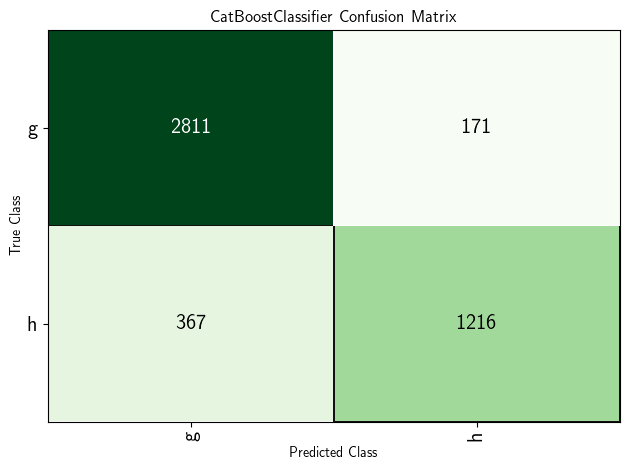

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [12]:
pyc.plot_model(tuned_model_clf, plot='confusion_matrix')

The following plot shows us some metrics (Precision, Recall, and F1 score) for the separate original classes. It also shows the Support of each class (number of elements in each class originally).  

The model has some problems to work with class 7.

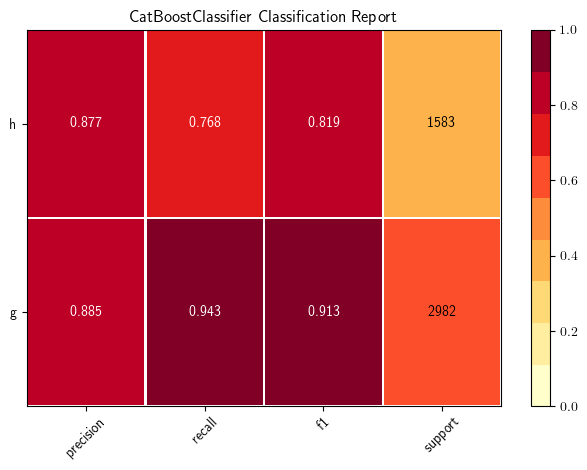

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [13]:
pyc.plot_model(tuned_model_clf, plot='class_report')

Now, we can see the Feature Importances. Since we are using a model based on Decision Trees, it is possible to calculate the decrease on variance after each node of the tree. The features that make the variance decrease the most will show a higher importance.  

This plot (`plot='feature'`) only shows the ten most important features. If we wanted the full list, we should have used `plot='feature_all'`.

In [17]:
# pyc.plot_model(tuned_model_clf, plot='feature_all')

Another plot we can produce shows the predictions for each of the original classes. We can see the fraction of elements that were correctly (or not) predicted to be in each of the classes.

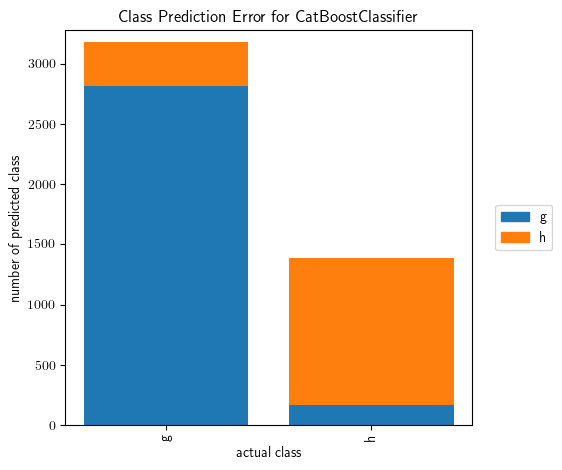

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [14]:
pyc.plot_model(tuned_model_clf, plot='error')

Finally, we can print the parameters of the trained model. For the moment, they are not that relevant to us, but we might use them to compare it to other realizations of itself.

In [15]:
pyc.plot_model(tuned_model_clf, plot='parameter')

,Parameters
nan_mode,Min
eval_metric,Logloss
iterations,1000
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [16]:
tuned_model_clf

Now, using the task `predict_model`, we can obtain a DataFrame with the predicted values for the Test subset. With `raw_score=True`, we can get the score (or probability) for an element to be in each of the classes.

In [17]:
pyc.predict_model(tuned_model_clf, raw_score=True)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=<catboost.core.CatBoostClassifier object at 0x7f2467fb6b10>, probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8821,0.9437,0.7682,0.8767,0.8189,0.7321,0.7356


,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class,Label,Score_g,Score_h
0,-0.256570,-1.582313,-0.265725,0.300797,0.103701,-0.158914,-0.653069,0.129002,-0.935132,-1.622817,h,h,0.4652,0.5348
1,-0.660185,-0.095894,-0.423725,0.055653,-0.107701,-0.118305,0.058554,0.597444,-0.319655,-1.244750,g,g,0.9361,0.0639
2,2.000466,0.386183,-0.023603,-0.081836,-0.371816,-3.285100,2.649515,-0.881365,0.496240,0.460284,h,h,0.1145,0.8855
3,-1.158805,-0.700966,-1.663313,1.709585,1.480410,0.084677,-0.129374,-0.580079,0.888742,0.096207,h,g,0.6750,0.3250
4,-1.116925,-1.589397,-1.815612,1.681039,1.461238,0.026255,-0.474306,0.259214,0.921312,-1.055551,g,g,0.9386,0.0614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4560,0.363707,-0.644540,-0.607258,-0.234869,-0.380847,-0.786268,0.038648,-0.440211,0.656324,0.194737,h,g,0.5068,0.4932
4561,-0.184853,-1.173614,-0.208931,1.216005,1.344031,-0.178868,-0.124804,-0.151304,-1.279143,-0.957926,h,h,0.1144,0.8856
4562,0.319781,-0.223184,0.636393,-0.152691,-0.124466,0.688267,0.782786,-0.218534,1.467025,-0.691412,h,h,0.0423,0.9577
4563,-1.217211,-0.126494,-1.294002,0.670742,0.414529,0.205736,0.048179,-0.545689,1.500128,0.221778,g,g,0.8414,0.1586


## Finalize the model

After checking that the predictions look reasonable, we want to finalize the model. In the context of PyCaret, this means that the system will combine both Training and Test subsets and will re-train the model with this new dataset. In general, this will create a better model, given that we are using more data than before.

In [18]:
final_model_clf = pyc.finalize_model(tuned_model_clf)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=<catboost.core.CatBoostClassifier object at 0x7f2467fb6b10>, fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing <catboost.core.CatBoostClassifier object at 0x7f2467fb6b10>
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=<catboost.core.CatBoostClassifier object at 0x7f2467fb6b10>, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=False, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:CatBoost Classifier Import

After this step, we cannot use the Test set for obtaining predictions. It has been used for training, thus any score taken from it will be biased.  

That is the reason to create a Validation subset. We can use the trained model into it to get our `final` predictions.

In [19]:
validation_prediction_clf = pyc.predict_model(final_model_clf, data=data_validation_clf, raw_score=True)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=<catboost.core.CatBoostClassifier object at 0x7f246839f9d0>, probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0,0.9315,0,0,0,0,0


Now, to assess the predictions we have just made, we can create a confusion matrix with the validation data. Since this dataset was left out of PyCaret, we need to create this plot by ourselves.

In [20]:
cm_mat_val_large = np.array([[np.sum(np.array(validation_prediction_clf['Label'] == col_num) &
                                     np.array(validation_prediction_clf['Class'] == row_num)) for col_num in ['g', 'h']] for row_num in ['g', 'h']])

In [21]:
mpl.rcdefaults()
plt.rcParams['text.usetex'] = True

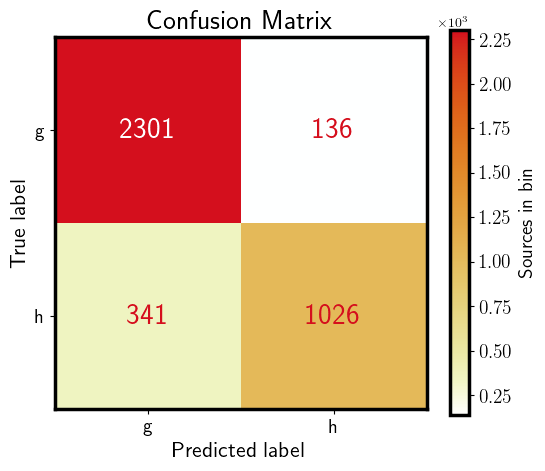

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

fig             = plt.figure(figsize=(6,5))
ax1             = fig.add_subplot(111)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mat_val_large,
                              display_labels=['g', 'h'])


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp_b = disp.plot(include_values=True,
                   cmap=cm.get_cmap('cet_CET_L18'), 
                   ax=ax1, 
                   xticks_rotation='horizontal')

for text_val in disp_b.text_.flatten():
    text_val.set_fontsize(21)
clb = plt.gca().images[-1].colorbar
clb.ax.tick_params(labelsize=14)
clb.ax.ticklabel_format(style='sci', scilimits=(0, 0))
clb.outline.set_linewidth(2.5)
clb.ax.set_ylabel('Sources in bin', size=14)

ax1.xaxis.get_label().set_fontsize(16)
ax1.yaxis.get_label().set_fontsize(16)

ax1.tick_params(axis='both', which='major', labelsize=14)

plt.setp(ax1.spines.values(), linewidth=2.5)
plt.setp(ax1.spines.values(), linewidth=2.5)
ax1.set_title('Confusion Matrix', fontsize=20)
plt.show()

## Save the model

In [27]:
# pyc.save_model(final_model_clf, 'model_final_clf_example')  # Model (it will be saved with .pkl extension)
# pyc.save_config('config_final_clf_example')  # Configuration file

In [28]:
# pyc.load_config('config_final_clf_example')

In [29]:
# final_model_clf = pyc.load_model('model_final_clf_example')

## Regression

For the case of regression, the steps are mostly the same as before.

In [23]:
data_train_test_reg = data_reg.sample(frac=0.8, random_state=seed)  # Train + test sets
data_train_reg      = data_train_test_reg.sample(frac=0.7, random_state=seed)  # Train data
data_test_reg       = data_train_test_reg.drop(data_train_reg.index)  # Test data
data_validation_reg = data_reg.drop(data_train_test_reg.index)  # Validation data

print('Shape of used data')
print('-' * 50)
print(f'Full Dataset size:                  {data_reg.shape}')
print(f'Data for Modeling (Train and Test): {data_train_test_reg.shape}')
print(f'Data for Training:                  {data_train_reg.shape}')
print(f'Data for Testing:                   {data_test_reg.shape}')
print(f'Unseen Data For Validation:         {data_validation_reg.shape}')
print('-' * 50)

Shape of used data
--------------------------------------------------
Full Dataset size:                  (6000, 8)
Data for Modeling (Train and Test): (4800, 8)
Data for Training:                  (3360, 8)
Data for Testing:                   (1440, 8)
Unseen Data For Validation:         (1200, 8)
--------------------------------------------------


Pay attention that, now, we are using the `Regression` sub-module of PyCaret, the dataset is different and the target feature is the price of the diamonds.

In [24]:
exp_reg = pyr.setup(data=data_train_reg, 
                    test_data=data_test_reg, 
                    target='Price', 
                    session_id=seed, 
                    silent=True,
                    feature_selection=True, 
                    feature_selection_method='boruta',
                    transformation=True, 
                    transformation_method='yeo-johnson', 
                    n_jobs=-1,
                    normalize=True, 
                    normalize_method='zscore', 
                    use_gpu=False)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(3360, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3360, 13)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('fix_perfect', Remove_100(target='Price')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select',
                 Boruta_Feature_Selection(alpha=0.05, max_iter

In [25]:
pyr.get_config('X').columns

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=X)
INFO:logs:Global variable: X returned as       Carat Weight  Cut_Signature-Ideal  Color_D  Color_E  Color_F  Color_H  \
683      -1.496436                  0.0      0.0      0.0      0.0      0.0   
4322     -0.510282                  0.0      0.0      0.0      0.0      0.0   
3615      1.364262                  0.0      1.0      0.0      0.0      0.0   
4467      0.219736                  0.0      0.0      0.0      0.0      0.0   
2982     -0.585868                  0.0      0.0      1.0      0.0      0.0   
...            ...                  ...      ...      ...      ...      ...   
1315     -0.329790                  0.0      0.0      0.0      0.0      0.0   
4062     -0.624388                  0.0      0.0      0.0      1.0      0.0   
2690     -1.080052                  0.0      0.0      0.0      0.0      1.0   
527      -1.080052                  0.0      0.0      0.0      1.0      0.0   
3621      1.354643   

Index(['Carat Weight', 'Cut_Signature-Ideal', 'Color_D', 'Color_E', 'Color_F',
       'Color_H', 'Color_I', 'Clarity_FL', 'Clarity_IF', 'Clarity_SI1',
       'Clarity_VS2', 'Clarity_VVS1', 'Clarity_VVS2'],
      dtype='object')

For Regressions, the list of available models is longer.

In [26]:
pyr.models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


It is not possible to use the same metrics for Regression and Classifiction. For this section, we will select the `R2` score (https://en.wikipedia.org/wiki/Coefficient_of_determination), which will have a higher value for better predictions.

In [27]:
top_model_reg = pyr.compare_models(n_select=1, sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,684.8465,2.153961e+06,1385.4997,0.9799,0.0769,0.0574,1.084
xgboost,Extreme Gradient Boosting,758.9805,2.274849e+06,1475.4177,0.9784,0.0834,0.0624,0.510
et,Extra Trees Regressor,808.0206,2.736536e+06,1591.5326,0.9741,0.0916,0.0679,0.649
rf,Random Forest Regressor,831.4770,3.479919e+06,1788.0194,0.9670,0.0923,0.0675,0.714
gbr,Gradient Boosting Regressor,923.3070,3.334795e+06,1796.2438,0.9682,0.1086,0.0815,0.150
lightgbm,Light Gradient Boosting Machine,856.1120,3.805827e+06,1895.2876,0.9642,0.0899,0.0670,0.066
knn,K Neighbors Regressor,909.0802,4.800000e+06,2090.9790,0.9555,0.0984,0.0711,0.096
dt,Decision Tree Regressor,971.5826,4.991447e+06,2170.1262,0.9530,0.1095,0.0778,0.022
ada,AdaBoost Regressor,4129.9425,2.450705e+07,4939.7343,0.7612,0.4774,0.5508,0.154
ridge,Ridge Regression,3454.1947,2.566163e+07,5044.0507,0.7531,0.6991,0.4280,0.017


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 2
INFO:logs:<catboost.core.CatBoostRegressor object at 0x7f2441020f10>
INFO:logs:compare_models() succesfully completed......................................


In [28]:
tuned_model_reg = pyr.tune_model(top_model_reg, 
                                 early_stopping=True, 
                                 optimize='RMSE', 
                                 choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1063.5615,4.577180e+06,2139.4344,0.9638,0.1090,0.0825
1,896.5284,3.838479e+06,1959.2036,0.9613,0.1040,0.0801
2,785.9879,1.705850e+06,1306.0819,0.9813,0.0958,0.0725
3,796.0986,2.493283e+06,1579.0132,0.9721,0.1002,0.0723
4,833.5555,2.276547e+06,1508.8230,0.9785,0.1007,0.0755
5,708.7566,1.137118e+06,1066.3575,0.9873,0.0955,0.0738
6,867.8692,1.940523e+06,1393.0264,0.9816,0.0915,0.0719
7,1000.6320,3.771601e+06,1942.0611,0.9714,0.1056,0.0813
8,829.3717,2.209347e+06,1486.3874,0.9747,0.0910,0.0698


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 3
INFO:logs:<catboost.core.CatBoostRegressor object at 0x7f2440f9c550>
INFO:logs:tune_model() succesfully completed......................................


The plots that we can create for Regression are different from the ones from Classification.  

The first plot we can see shows a comparison between the true and predicted values for the Test set. The prediction, as we can see, is pretty good for lower values but it worsens a bit towards higher quantities.

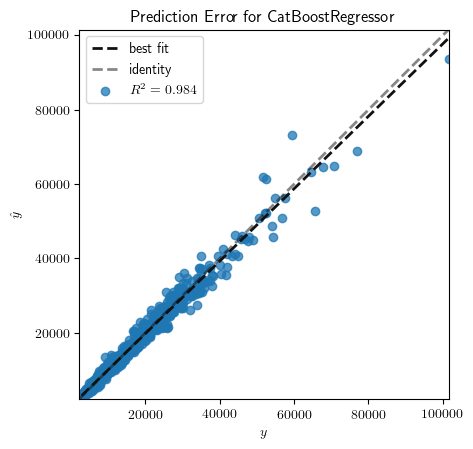

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [29]:
pyr.plot_model(tuned_model_reg, plot='error')

Another plot shows the residuals ($Y_{\mathrm{True}} - Y_{\mathrm{Predicted}}$) for the predictions on the Test set.

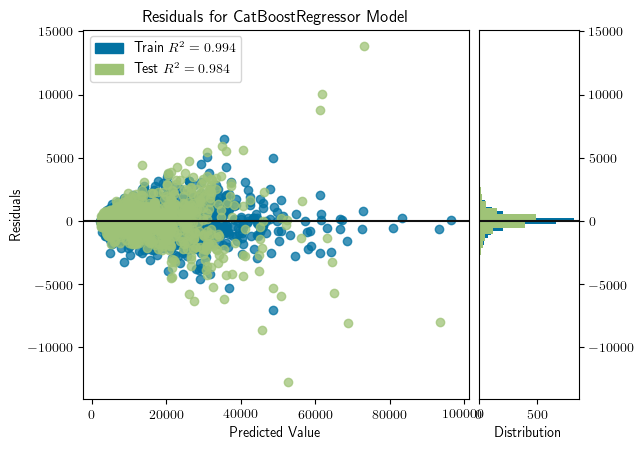

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [30]:
pyr.plot_model(tuned_model_reg, plot='residuals')

In [38]:
# pyr.plot_model(tuned_model_reg, plot='feature_all')

In [31]:
pyr.plot_model(tuned_model_reg, plot='parameter')

,Parameters
nan_mode,Min
eval_metric,RMSE
iterations,1000
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [32]:
pyr.predict_model(tuned_model_reg)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f2440f9c550>, probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,731.6364,1.768476e+06,1329.8405,0.9835,0.0757,0.0584


,Carat Weight,Cut_Signature-Ideal,Color_D,Color_E,Color_F,Color_H,Color_I,Clarity_FL,Clarity_IF,Clarity_SI1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Price,Label
0,0.271107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9105,9920.707061
1,-0.005124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8034,8759.725761
2,-1.080052,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4921,4241.288334
3,0.896178,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12107,12235.870800
4,-1.694079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3040,3225.533034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1.420217,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,17916,17342.309114
1436,1.354643,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20940,21355.312131
1437,-0.624388,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5501,5679.689343
1438,-0.547833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7068,6430.292228


## Finalize the model

In [33]:
final_model_reg = pyr.finalize_model(tuned_model_reg)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f2440f9c550>, fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing <catboost.core.CatBoostRegressor object at 0x7f2440f9c550>
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f2440f9c550>, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=False, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:CatBoost Regressor Imported s

We now use the final model on the Validation sub-set and create a plot to compare the values that have been obtained to the original ones.  
As before, and given that this dataset is outside of PyCaret, the plot to show this is created by us. And it is constructed as a density plot. That means that each small square (pixel) shows the density of points on that position of the plot.

In [34]:
validation_prediction_reg = pyr.predict_model(final_model_reg, data=data_validation_reg)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f24402a0d10>, probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,703.3189,1.751630e+06,1323.4917,0.9822,0.0771,0.0583


In [35]:
mpl.rcdefaults()
plt.rcParams['text.usetex'] = True

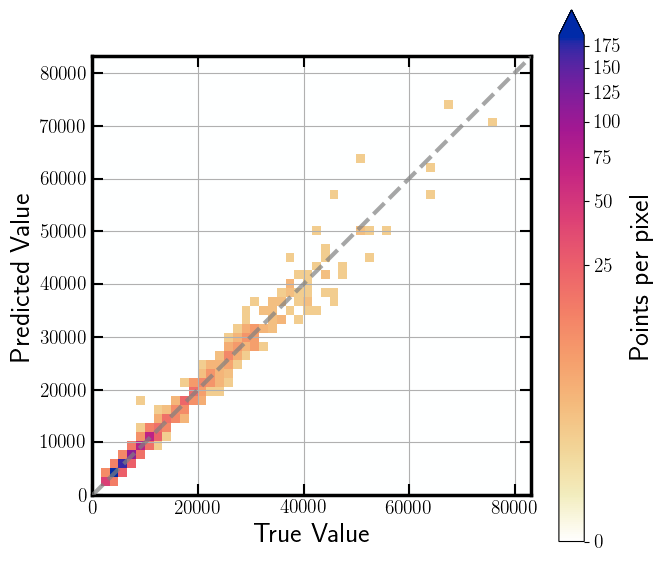

In [37]:
fig             = plt.figure(figsize=(7,6))
ax1             = fig.add_subplot(111, projection='scatter_density')

max_val = np.nanmax([np.nanmax(validation_prediction_reg.loc[:, 'Price']), np.nanmax(validation_prediction_reg.loc[:, 'Label'])])

norm = ImageNormalize(vmin=0., stretch=PowerStretch(0.3))

dens_1 = ax1.scatter_density(validation_prediction_reg.loc[:, 'Price'].sample(frac=1, random_state=seed), 
                             validation_prediction_reg.loc[:, 'Label'].sample(frac=1, random_state=seed), 
                             cmap=plt.get_cmap('cet_CET_L17'), 
                             zorder=0, 
                             dpi=12, 
                             alpha=1, 
                             norm=norm)
ax1.plot([-1, max_val*1.2], [-1, max_val*1.2], ls='--', marker=None, c='Gray', alpha=0.7, lw=3.0, zorder=20)

clb_b = plt.colorbar(dens_1, extend='max')
clb_b.ax.tick_params(labelsize=14)
clb_b.outline.set_linewidth(2.5)
# clb_b.ax.set_ylabel('Points per pixel', size=20)
clb_b.set_label('Points per pixel', size=20)

ax1.set_xlabel('True Value', fontsize=20)
ax1.set_ylabel('Predicted Value', fontsize=20)
ax1.tick_params(which='both', top=True, right=True, direction='in')
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(which='major', length=8, width=1.5)
ax1.tick_params(which='minor', length=4, width=1.5)
plt.setp(ax1.spines.values(), linewidth=2.5)
plt.setp(ax1.spines.values(), linewidth=2.5)
ax1.set_xlim(left=-0.3, right=max_val*1.1)
ax1.set_ylim(bottom=-0.3, top=max_val*1.1)
ax1.grid(zorder=0)
#ax1.set_aspect('equal', 'datalim')
ax1.set_aspect('equal', 'box')
fig.tight_layout()
plt.show()

## Save the model

In [ ]:
# pyr.save_model(final_model_reg, 'model_final_reg_example')  # Model (it will be saved with .pkl extension)
# pyr.save_config('config_final_reg_example')  # Configuration file

In [46]:
# pyr.load_config('config_final_reg_example')

In [47]:
# final_model_reg = pyr.load_model('model_final_reg_example')